In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [11]:
iris = datasets.load_iris()
X = iris.data[iris.target != 0][:, :2]
y = iris.target[iris.target != 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classifier = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
classifier.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [12]:
def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

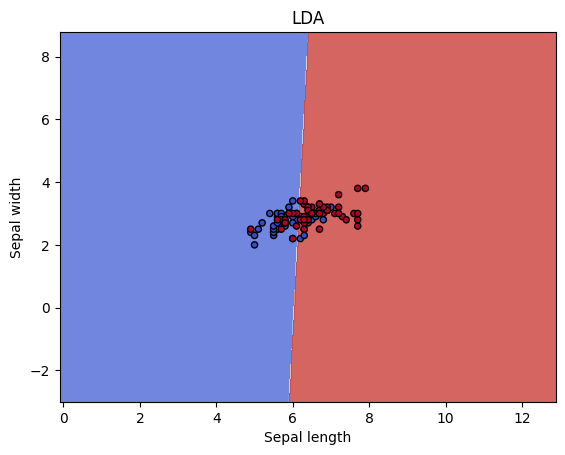

In [13]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('LDA')

plt.show()